## Introduction:
### Purpose:
Recommend a Denver neighborhood to open a new Starbucks location so the real-estate team can begin scouting properties. 
### Determining factors:
- Starbucks primary demographic is affluent families and adults aged 20 to 34
- Stakeholders have expressed desire to consider proximity, but the new location can still be in a neighborhood that already has a Starbucks location.
## Recommendation: 
Green Valley Ranch is a strong neighborhood candidate for opening a new starbucks location.
- The nearest location to this neighborhood is the location on Chambers and 40th, located south of Green Valley Ranch.
- Green Valley Ranch has a population of 7778 that is between the ages of 18 to 34. 26.64% of their total population
- Green Valley Ranch has 2192 households with an income of $100,000 or more.

## Additional considerations:
Data from the Chambers and 40th location would help to make further predictions on the success of a new Starbucks location in the Gateway - Green Valley Ranch area. 
Predictors could include:
- Volume compared to Denver average volume
- Average wait time during peak hours
- Number of cars per household to predict the ROI on a drive through

## 💾 The data
_This section was assembled by [Data Camp](https://app.datacamp.com/learn/competitions/denver-coffee-shop) for a competition to determine the best location to open a new coffee shop._

You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._ 

Hidden cells consist of code for ETL process

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import contextily as cx


In [2]:
denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [3]:
gdf = gpd.GeoDataFrame(
    denver, geometry=gpd.points_from_xy(denver.Longitude, denver.Latitude), crs="EPSG:4326"
)
gdf

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude,geometry
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75,POINT (-105.01000 39.75000)
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75,POINT (-104.99000 39.75000)
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68,POINT (-104.97000 39.68000)
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76,POINT (-105.02000 39.76000)
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77,POINT (-105.05000 39.77000)
...,...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75,POINT (-105.00000 39.75000)
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76,POINT (-104.90000 39.76000)
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74,POINT (-104.97000 39.74000)
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65,POINT (-104.91000 39.65000)


In [4]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [5]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


In [6]:
# Join geographical and census information
neighborhood_census = pd.merge(
    neighborhoods,
    census,
    how="inner",
    left_on=["NBHD_ID", "NBHD_NAME"],
    right_on=["NBHD_ID", "NBHD_NAME"],
)
#Filter geographical information
nbhd_census = neighborhood_census[['NBHD_NAME','geometry','POPULATION_2010','AGE_18_TO_34','NUM_HHLD_100K+']]
#Calculate percent of poopulation aged 18 to 34
nbhd_census['PERC_18_TO_34'] = round((nbhd_census['AGE_18_TO_34']/nbhd_census['POPULATION_2010'])*100,2)
nbhd_census = nbhd_census.set_crs('EPSG:4326')

#Create DF containing 5 neighborhoods with largest population age 18 to 34
df_top5_age = nbhd_census.nlargest(5,'AGE_18_TO_34')
#Reindex by rank 
df_top5_age = df_top5_age.reset_index(drop=True)
df_top5_age.index = df_top5_age.index + 1

#Create DF containing 5 neighborhoods with largest number of households with annual income 100K+
df_top5_income = nbhd_census.nlargest(5,'NUM_HHLD_100K+')
#Reindex by rank
df_top5_income = df_top5_income.reset_index(drop=True)
df_top5_income.index = df_top5_income.index + 1

#Create DF containing 5 neighborhoods with largest population in 2010
df_top5_population2010 = nbhd_census.nlargest(5,'POPULATION_2010')

In [7]:
df_top5_age_income = (pd.concat([df_top5_age, df_top5_income],
                  keys=['top5_age', 'top5_income']))
df_top5_age_income

NBHD_NAME  ... PERC_18_TO_34
top5_age    1                  Capitol Hill  ...         56.26
            2  Gateway - Green Valley Ranch  ...         26.64
            3                     Montbello  ...         25.51
            4                   Five Points  ...         46.89
            5                    University  ...         61.70
top5_income 1                  Central Park  ...         28.74
            2  Gateway - Green Valley Ranch  ...         26.64
            3                       Hampden  ...         26.53
            4                 Hampden South  ...         25.95
            5                       Hilltop  ...         12.14

[10 rows x 6 columns]

### Largest Populations 18-35 years of age

In [8]:
display(df_top5_age[['NBHD_NAME','AGE_18_TO_34','PERC_18_TO_34']])

,NBHD_NAME,AGE_18_TO_34,PERC_18_TO_34
1,Capitol Hill,8274.0,56.26
2,Gateway - Green Valley Ranch,7778.0,26.64
3,Montbello,7742.0,25.51
4,Five Points,5961.0,46.89
5,University,5784.0,61.70


### Most households with incomes 100K+

In [9]:
display(df_top5_income[['NBHD_NAME','NUM_HHLD_100K+']])

,NBHD_NAME,NUM_HHLD_100K+
1,Central Park,2748.0
2,Gateway - Green Valley Ranch,2192.0
3,Hampden,2160.0
4,Hampden South,2158.0
5,Hilltop,2110.0


## Geography of Denver and existing locations

<AxesSubplot: title={'center': 'Neighborhoods: \n Largest 18-35 year old populations'}>

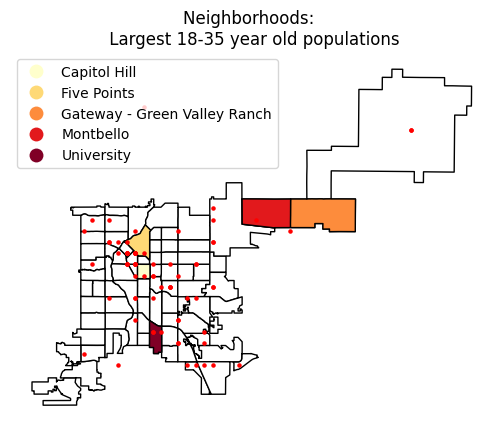

In [10]:
# top 5 18-35 age
ax = neighborhood_census['geometry'].plot(color='white', edgecolor='black')
df_top5_age.plot(ax=ax, column="NBHD_NAME",categorical=True,legend=True, legend_kwds={"loc": "best"},
    cmap='YlOrRd', edgecolor='black')
gdf['geometry'].plot(ax=ax, markersize=5, marker='o', color='red')
ax.set_axis_off()
ax.set(title='Neighborhoods: \n Largest 18-35 year old populations')
ax

<AxesSubplot: title={'center': 'Neighborhoods \n most households with incomes 100K+'}>

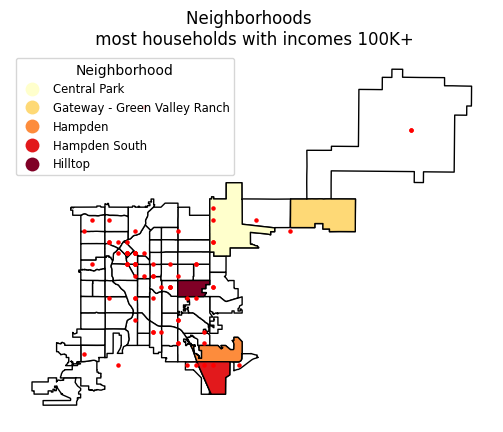

In [11]:
ax = neighborhood_census['geometry'].plot(color='white', edgecolor='black')
df_top5_income.plot(ax=ax, column="NBHD_NAME",categorical=True,legend=True, legend_kwds={"loc": "upper left", 
                        'markerscale':1, 
                        'title_fontsize':'medium', 
                        'fontsize':'small'},
    cmap='YlOrRd', edgecolor='black')
gdf['geometry'].plot(ax=ax, markersize=5, marker='o', color='red')
ax.set_axis_off()
ax.set(title='Neighborhoods \n most households with incomes 100K+')
leg1 = ax.get_legend()
leg1.set_title('Neighborhood')
ax

### Interactive map: Age 18-34
Click on neighborhood for additional information

In [12]:
gdf = gdf.to_crs("ESRI:102001")
df_top5_age = df_top5_age.set_crs("EPSG:4326")
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf_buffer.buffer(500)
m = df_top5_age.explore(column='NBHD_NAME',
                                scheme='naturalbreaks',
                                legend=True,
                                k=10,
                                tooltip='AGE_18_TO_34',
                                popup=True,
                                legend_kwds=dict(colorbar=False),
                                style_kwds=dict(color='black'),
                                missing_kwds={
                                    'color':'black',
                                    'edgecolor':'black',
                                    'hatch': "///",
                                    'label': "Missing values",
                                    },
                               cmap="YlOrRd")
# Corrected line: Use explore instead of plot for consistency with folium map `m`
base = gdf_buffer.explore(m=m, color='red', name='locations')
m

### Interactive map: Income
Click on neighborhood for additional information

In [13]:
gdf = gdf.to_crs("ESRI:102001")
df_top5_income = df_top5_income.set_crs("EPSG:4326")
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf_buffer.buffer(500)
m = df_top5_income.explore(column='NBHD_NAME',
                                scheme='naturalbreaks',
                                legend=True,
                                k=10,
                                tooltip='NUM_HHLD_100K+',
                                popup=True,
                                legend_kwds=dict(colorbar=False),
                                style_kwds=dict(color='black'),
                                missing_kwds={
                                    'color':'black',
                                    'edgecolor':'black',
                                    'hatch': "///",
                                    'label': "Missing values",
                                    },
                               cmap="YlOrRd")
base = gdf_buffer.explore(m=m, color='red', name='locations')
m